In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv("incomes.csv")
df.head()

,age,workclass,fnlwgt,education,education_num,martial_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
cols = ['age','education_num','capital_gain','capital_loss','hours_per_week','label']
df = df[cols]
df.head()

,age,education_num,capital_gain,capital_loss,hours_per_week,label
0,39,13,2174,0,40,<=50K
1,50,13,0,0,13,<=50K
2,38,9,0,0,40,<=50K
3,53,7,0,0,40,<=50K
4,28,13,0,0,40,<=50K


In [4]:
df['label_code'] = pd.Categorical(df['label']).codes
df.head(10)

,age,education_num,capital_gain,capital_loss,hours_per_week,label,label_code
0,39,13,2174,0,40,<=50K,0
1,50,13,0,0,13,<=50K,0
2,38,9,0,0,40,<=50K,0
3,53,7,0,0,40,<=50K,0
4,28,13,0,0,40,<=50K,0
5,37,14,0,0,40,<=50K,0
6,49,5,0,0,16,<=50K,0
7,52,9,0,0,45,>50K,1
8,31,14,14084,0,50,>50K,1
9,42,13,5178,0,40,>50K,1


In [5]:
import matplotlib.pyplot as plt
df[['age','hours_per_week','education_num','label_code']].hist()
plt.show()

<Figure size 640x480 with 4 Axes>

In [6]:
df.describe(include='all')

,age,education_num,capital_gain,capital_loss,hours_per_week,label,label_code
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561,32561.000000
unique,NaN,NaN,NaN,NaN,NaN,2,NaN
top,NaN,NaN,NaN,NaN,NaN,<=50K,NaN
freq,NaN,NaN,NaN,NaN,NaN,24720,NaN
mean,38.581647,10.080679,1077.648844,87.303830,40.437456,NaN,0.240810
std,13.640433,2.572720,7385.292085,402.960219,12.347429,NaN,0.427581
min,17.000000,1.000000,0.000000,0.000000,1.000000,NaN,0.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000,NaN,0.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000,NaN,0.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000,NaN,0.000000


In [7]:
cross1 = pd.crosstab(pd.qcut(df['education_num'],[0,0.25,0.5,0.75,1]),df['label'])
cross1

label,<=50K,>50K
education_num,,
"(0.999, 9.0]",12835,1919
"(9.0, 10.0]",5904,1387
"(10.0, 12.0]",1823,626
"(12.0, 16.0]",4158,3909


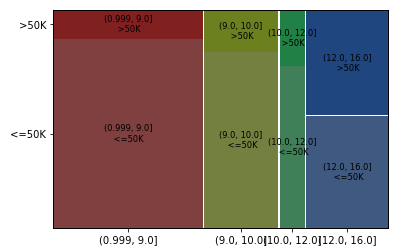

In [8]:
from statsmodels.graphics.mosaicplot import mosaic
mosaic(cross1.stack());

In [9]:
cross2 = pd.crosstab(pd.cut(df['hours_per_week'],5),df['label'])
cross2

label,<=50K,>50K
hours_per_week,,
"(0.902, 20.6]",2733,195
"(20.6, 40.2]",16262,3790
"(40.2, 59.8]",4192,2804
"(59.8, 79.4]",1312,932
"(79.4, 99.0]",221,120


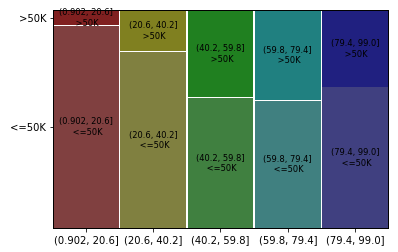

In [10]:
cross2_norm = cross2.div(cross2.sum(1).astype("float"),axis = 0)
mosaic(cross2_norm.stack());

In [11]:
from sklearn.model_selection import train_test_split
x = df[['age','education_num','capital_gain','capital_loss','hours_per_week']]
y = df['label_code']

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

In [14]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(C=1e5,solver = 'liblinear')
logreg.fit(x_train_std, y_train)
acc = logreg.score(x_test_std,y_test)

In [15]:
acc

0.8088438507600184